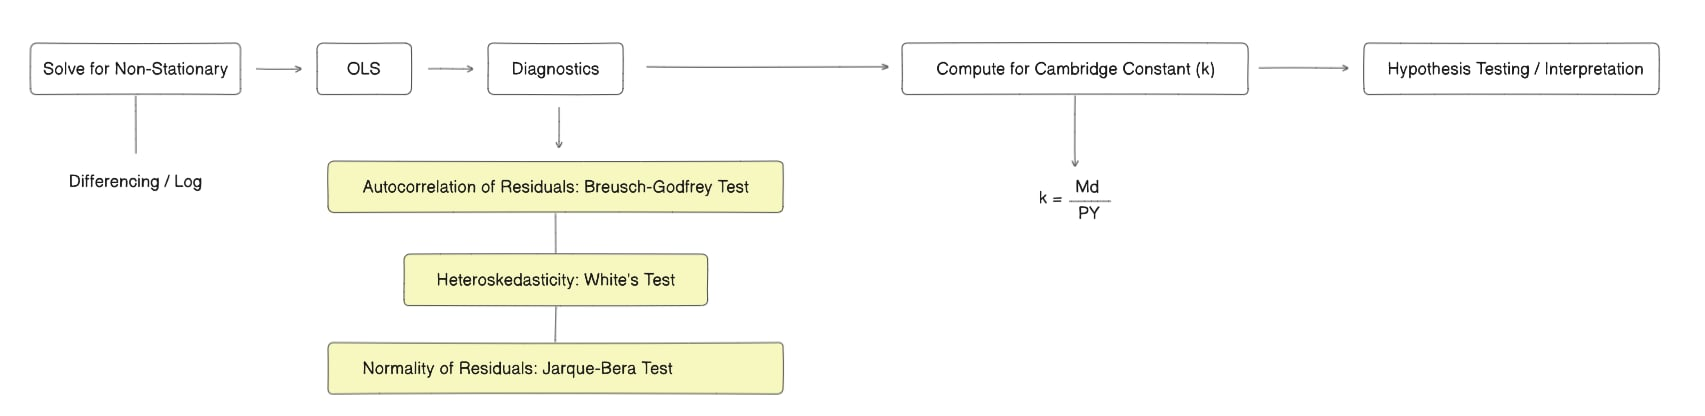

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('monetary_final_data.xlsx')

In [3]:
df.head()

,Year,Money_supply,Real_income,Price_level
0,2000,1860000,144506,58.9
1,2003,2278000,148000,65.2
2,2006,2963000,172000,76.9
3,2009,4611000,206000,89.2
4,2012,5724000,235000,100.0


## Checking stationary data

In [4]:
from statsmodels.tsa.stattools import adfuller

In [117]:
adf_test(df['Money_supply'])
adf_test(df['Real_income'])
adf_test(df['Price_level'])

Augmented Dickey-Fuller Test: 
ADF Statistic: 1.5590006926501163
p-value: 0.9977292098141319
# Lags Used: 2
# Observations Used: 6
=> Non-stationary (Fail to reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -0.05135591169452873
p-value: 0.9540732523431991
# Lags Used: 1
# Observations Used: 7
=> Non-stationary (Fail to reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -1.7376872580412839
p-value: 0.4118068825409915
# Lags Used: 0
# Observations Used: 8
=> Non-stationary (Fail to reject the null hypothesis)



## Applying differencing or log

In [25]:
df['ms_diff'] = df['Money_supply'].diff()
df['ri_diff'] = df['Real_income'].diff()
df['pl_diff'] = df['Price_level'].diff()

#### Dropping first row since it contains NaN (due to differencing)

In [26]:
df_diff = df.dropna().reset_index(drop=True)

In [27]:
df_diff

,Year,Money_supply,Real_income,Price_level,ms_diff,ri_diff,pl_dif,pl_diff
0,2003,2278000,148000,65.2,418000.0,3494.0,6.3,6.3
1,2006,2963000,172000,76.9,685000.0,24000.0,11.7,11.7
2,2009,4611000,206000,89.2,1648000.0,34000.0,12.3,12.3
3,2012,5724000,235000,100.0,1113000.0,29000.0,10.8,10.8
4,2015,8178000,267000,107.0,2454000.0,32000.0,7.0,7.0
5,2018,12764000,313000,117.3,4586000.0,46000.0,10.3,10.3
6,2020,18190000,307190,123.3,5426000.0,-5810.0,6.0,6.0
7,2023,23250000,353230,122.2,5060000.0,46040.0,-1.1,-1.1


In [118]:
adf_test(df_diff['ms_diff'])
adf_test(df_diff['ri_diff'])
adf_test(df_diff['pl_diff'])

Augmented Dickey-Fuller Test: 
ADF Statistic: -0.4825869892138663
p-value: 0.8953699695343198
# Lags Used: 0
# Observations Used: 7
=> Non-stationary (Fail to reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -2.845157404196122
p-value: 0.0521072444798668
# Lags Used: 2
# Observations Used: 5
=> Non-stationary (Fail to reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -0.4525420281912007
p-value: 0.9009496549394367
# Lags Used: 0
# Observations Used: 7
=> Non-stationary (Fail to reject the null hypothesis)



#### ri_diff has p-value of 0.0521 (might pass the 10%), next is proceed to difference the ms_diff and pl_diff for the second time

In [31]:
df_diff['ms_diff2'] = df_diff['ms_diff'].diff()
df_diff['pl_diff2'] = df_diff['pl_diff'].diff()

In [32]:
adf_test(df_diff['ms_diff2'].dropna())

Augmented Dickey-Fuller Test: 
ADF Statistic: -1.9124758771739019
p-value: 0.32621501706219624
# Lags Used: 0
# Observations Used: 6
=> Non-stationary (Fail to reject the null hypothesis)



In [33]:
adf_test(df_diff['pl_diff2'].dropna())

Augmented Dickey-Fuller Test: 
ADF Statistic: -1.797661663111149
p-value: 0.38162322941722565
# Lags Used: 0
# Observations Used: 6
=> Non-stationary (Fail to reject the null hypothesis)



### Trying to logarithm then differencing

In [41]:
df.head()

,Year,Money_supply,Real_income,Price_level,ms_diff,ri_diff,pl_dif,pl_diff
0,2000,1860000,144506,58.9,NaN,NaN,NaN,NaN
1,2003,2278000,148000,65.2,418000.0,3494.0,6.3,6.3
2,2006,2963000,172000,76.9,685000.0,24000.0,11.7,11.7
3,2009,4611000,206000,89.2,1648000.0,34000.0,12.3,12.3
4,2012,5724000,235000,100.0,1113000.0,29000.0,10.8,10.8


In [42]:
df['log_ms'] = np.log(df['Money_supply'])
df['log_ri'] = np.log(df['Real_income'])
df['log_pl'] = np.log(df['Price_level'])

In [46]:
# adf testing the log values

adf_test(df['log_ms'])
adf_test(df['log_ri'])
adf_test(df['log_pl'])

Augmented Dickey-Fuller Test: 
ADF Statistic: 1.0655603370392113
p-value: 0.9949117062881809
# Lags Used: 2
# Observations Used: 6
=> Non-stationary (Fail to reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -1.4283917161556077
p-value: 0.5685916520283529
# Lags Used: 1
# Observations Used: 7
=> Non-stationary (Fail to reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -3.016182809752517
p-value: 0.03341051842982687
# Lags Used: 0
# Observations Used: 8
=> Stationary (Reject the null hypothesis)



In [56]:
# proceeding with .diff() the log values

df['dlog_ms'] = df['log_ms'].diff()
df['dlog_ri'] = df['log_ri'].diff()
df['dlog_pl'] = df['log_pl'].diff()

In [119]:
## money_supply (log) + (diff) = stationary
## real_income  (log) + (diff) = stationary
## price_level  (log) = stationary

In [57]:
adf_test(df['dlog_ms'])
adf_test(df['dlog_ri'])
## adf_test(df['dlog_pl'])

Augmented Dickey-Fuller Test: 
ADF Statistic: -2.9135883465395582
p-value: 0.043790522138158816
# Lags Used: 0
# Observations Used: 7
=> Stationary (Reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -3.259316926807758
p-value: 0.016797881733303634
# Lags Used: 0
# Observations Used: 7
=> Stationary (Reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -0.036734620760955815
p-value: 0.9553866575525722
# Lags Used: 0
# Observations Used: 7
=> Non-stationary (Fail to reject the null hypothesis)



### OLS

In [55]:
adf_test(df['dlog_ms'])
adf_test(df['dlog_ri'])
adf_test(df['log_pl'])

Augmented Dickey-Fuller Test: 
ADF Statistic: -2.9135883465395582
p-value: 0.043790522138158816
# Lags Used: 0
# Observations Used: 7
=> Stationary (Reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -3.259316926807758
p-value: 0.016797881733303634
# Lags Used: 0
# Observations Used: 7
=> Stationary (Reject the null hypothesis)

Augmented Dickey-Fuller Test: 
ADF Statistic: -3.016182809752517
p-value: 0.03341051842982687
# Lags Used: 0
# Observations Used: 8
=> Stationary (Reject the null hypothesis)



dlog_ms = β₀ + β₁ * dlog_ri + β₂ * log_pl + ε

In [54]:
import statsmodels.api as sm

df_ols = df[['dlog_ms', 'dlog_ri', 'log_pl']].dropna()

Y = df_ols['dlog_ms']
X = sm.add_constant(df_ols[['dlog_ri', 'log_pl']])

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                dlog_ms   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                    0.8202
Date:                Sat, 14 Jun 2025   Prob (F-statistic):              0.492
Time:                        06:51:44   Log-Likelihood:                 8.9533
No. Observations:                   8   AIC:                            -11.91
Df Residuals:                       5   BIC:                            -11.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4921      0.749     -0.657      0.5

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


# **Diagnostics**

Autocorrelation of Residuals: **Breusch-Godfrey Test**

Heteroscedasticity: **White's Test**

Normality of Residuals: **Jarque-Bera Test**

## Breusch-Godfrey Test

In [61]:
import statsmodels.stats.diagnostic as dg

print(dg.acorr_breusch_godfrey(model, nlags=1))

(np.float64(1.8427513584378588), np.float64(0.17462881330368213), 1.1971264866577425, 0.33536344299609816)


Test statistic x^2 = 1.84

P-value = 0.17 (higher than 0.05, may autocorrelation)

## White's test

H0 = Homoscedasticity is present

HA = Heteroscedasticity is present

In [63]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(3.8514350698039266), 'Test Statistic p-value': np.float64(0.5709979483148138), 'F-Statistic': np.float64(0.3713510705131373), 'F-Test p-value': np.float64(0.8391831748304566)}


Test statistic x^2 = 3.85

Corresponding p-value is 0.57

(thus, fail to reject the H0) or we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

## Jarque-Bera Test

Same with OLS results


In [64]:
from scipy.stats import jarque_bera

jb_stat, jb_p = jarque_bera(model.resid)
print(f"JB = {jb_stat:.3f},  p-value = {jb_p:.3f}")

JB = 0.504,  p-value = 0.777


## **Computing the Cambridge Constant (k)**

In [79]:
data = pd.read_excel('monetary_final_data.xlsx')

In [80]:
data.head()

,Year,Money_supply,Real_income,Price_level
0,2000,1860000,144506,58.9
1,2003,2278000,148000,65.2
2,2006,2963000,172000,76.9
3,2009,4611000,206000,89.2
4,2012,5724000,235000,100.0


In [81]:
data['k'] = data['Money_supply']/(data['Real_income'] * data['Price_level'])

In [82]:
data

,Year,Money_supply,Real_income,Price_level,k
0,2000,1860000,144506,58.9,0.218530
1,2003,2278000,148000,65.2,0.236072
2,2006,2963000,172000,76.9,0.224015
3,2009,4611000,206000,89.2,0.250936
4,2012,5724000,235000,100.0,0.243574
5,2015,8178000,267000,107.0,0.286254
6,2018,12764000,313000,117.3,0.347652
7,2020,18190000,307190,123.3,0.480245
8,2023,23250000,353230,122.2,0.538635


## **Graphs** (ChatGPT)

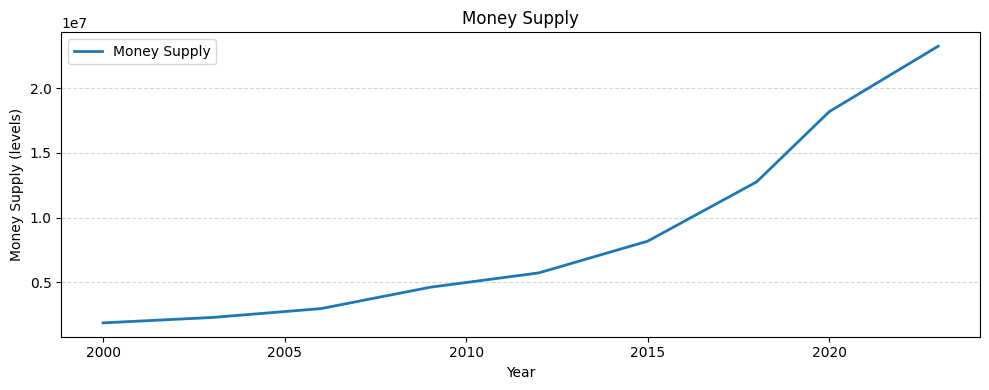

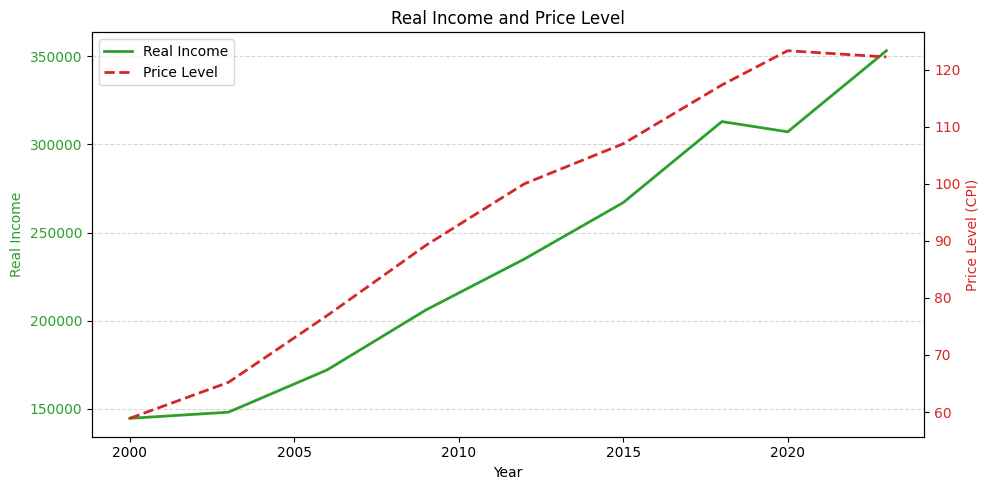

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------------
# 0.  Your DataFrame "data" must already be in memory
#     Columns: Year | Money_supply | Real_income | Price_level | k
# -------------------------------------------------------

# -------------------------------------------------------
# 1.  Money-Supply plot  →  save as money_supply.png
# -------------------------------------------------------
fig_ms, ax_ms = plt.subplots(figsize=(10, 4))
ax_ms.plot(data.Year, data.Money_supply,
           color="tab:blue", linewidth=2, label="Money Supply")
ax_ms.set_title("Money Supply")
ax_ms.set_xlabel("Year")
ax_ms.set_ylabel("Money Supply (levels)")
ax_ms.grid(True, axis='y', linestyle='--', alpha=0.5)
ax_ms.legend()

fig_ms.tight_layout()
fig_ms.savefig("money_supply.png", dpi=300)   # <-- saved here
plt.show()

# -------------------------------------------------------
# 2.  Real Income & Price Level (dual y-axis)  →  save as income_price.png
# -------------------------------------------------------
fig_ip, ax_left = plt.subplots(figsize=(10, 5))

# left y-axis → Real Income
ax_left.plot(data.Year, data.Real_income,
             color="tab:green", linewidth=2, label="Real Income")
ax_left.set_xlabel("Year")
ax_left.set_ylabel("Real Income", color="tab:green")
ax_left.tick_params(axis='y', labelcolor="tab:green")
ax_left.grid(True, axis='y', linestyle='--', alpha=0.5)

# right y-axis → Price Level
ax_right = ax_left.twinx()
ax_right.plot(data.Year, data.Price_level,
              color="tab:red", linewidth=2, linestyle='--', label="Price Level")
ax_right.set_ylabel("Price Level (CPI)", color="tab:red")
ax_right.tick_params(axis='y', labelcolor="tab:red")

# combine legends from both axes
lines  = ax_left.get_lines() + ax_right.get_lines()
labels = [ln.get_label() for ln in lines]
ax_left.legend(lines, labels, loc="upper left")

ax_left.set_title("Real Income and Price Level")
fig_ip.tight_layout()
fig_ip.savefig("income_price.png", dpi=300)   # <-- saved here
plt.show()

In [87]:
df.head()

## money_supply (log) + (diff) = stationary
## real_income  (log) + (diff) = stationary
## price_level  (log) = stationary

,Year,Money_supply,Real_income,Price_level,ms_diff,ri_diff,pl_dif,pl_diff,log_ms,log_ri,log_pl,dlog_ms,dlog_ri,dlog_pl
0,2000,1860000,144506,58.9,NaN,NaN,NaN,NaN,14.436087,11.881076,4.075841,NaN,NaN,NaN
1,2003,2278000,148000,65.2,418000.0,3494.0,6.3,6.3,14.638808,11.904968,4.177459,0.202721,0.023891,0.101618
2,2006,2963000,172000,76.9,685000.0,24000.0,11.7,11.7,14.901713,12.055250,4.342506,0.262904,0.150282,0.165046
3,2009,4611000,206000,89.2,1648000.0,34000.0,12.3,12.3,15.343955,12.235631,4.490881,0.442242,0.180382,0.148375
4,2012,5724000,235000,100.0,1113000.0,29000.0,10.8,10.8,15.560178,12.367341,4.605170,0.216223,0.131709,0.114289


In [90]:
data_raw = {'Money Supply': df['Money_supply'],
            'Real Income': df['Real_income'],
            'Price Level': df['Price_level']}

data_raw = pd.DataFrame(data_raw)

In [95]:
data_raw

,Money Supply,Real Income,Price Level
0,1860000,144506,58.9
1,2278000,148000,65.2
2,2963000,172000,76.9
3,4611000,206000,89.2
4,5724000,235000,100.0
5,8178000,267000,107.0
6,12764000,313000,117.3
7,18190000,307190,123.3
8,23250000,353230,122.2


In [92]:
stationary_data = {'Stationary Money Supply': df['dlog_ms'],
                   'Stationary Real Income': df['dlog_ri'],
                   'Stationary Price Level': df['log_pl']}

stationary_data = pd.DataFrame(stationary_data)

In [94]:
stationary_data

,Stationary Money Supply,Stationary Real Income,Stationary Price Level
0,NaN,NaN,4.075841
1,0.202721,0.023891,4.177459
2,0.262904,0.150282,4.342506
3,0.442242,0.180382,4.490881
4,0.216223,0.131709,4.605170
5,0.356780,0.127663,4.672829
6,0.445181,0.158955,4.764735
7,0.354243,-0.018737,4.814620
8,0.245433,0.139653,4.805659


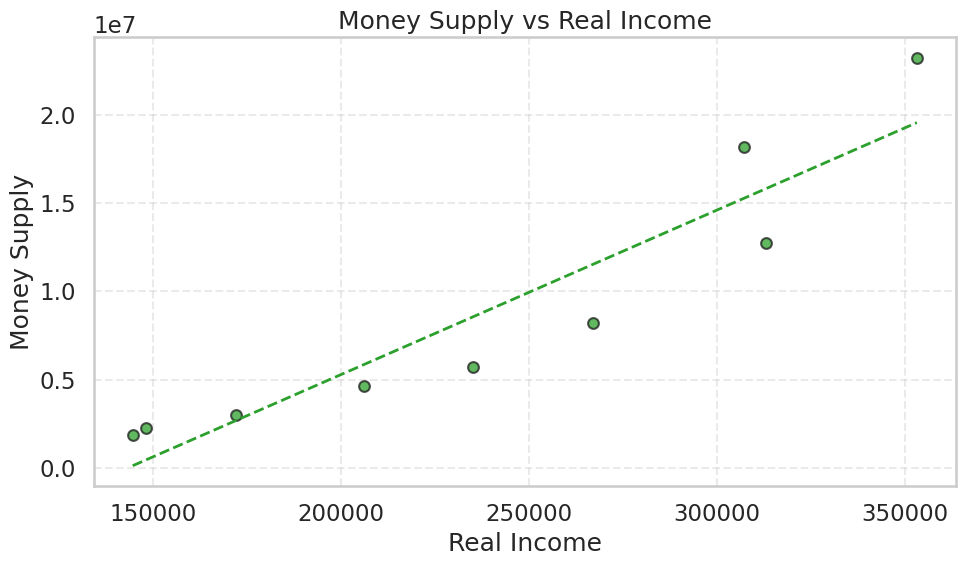

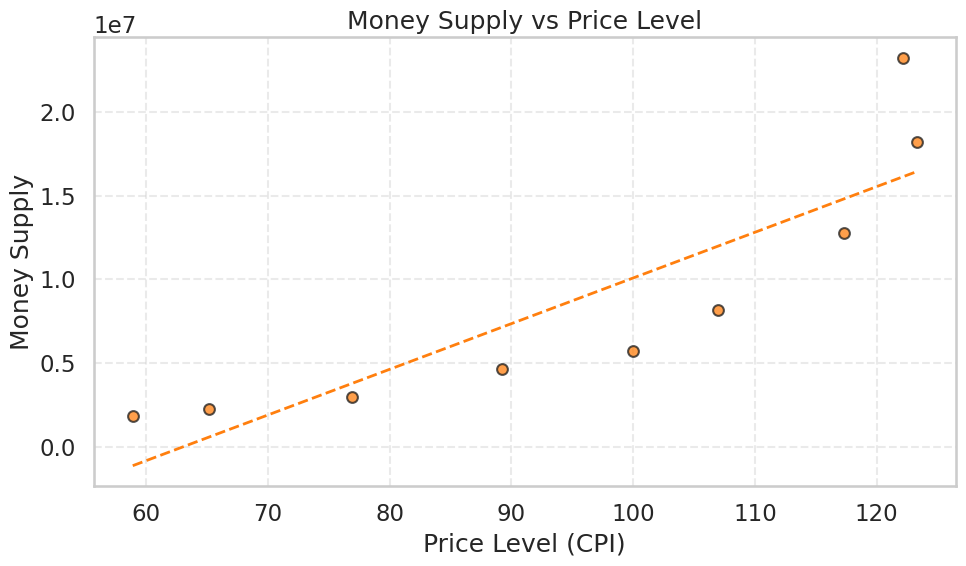

In [116]:
def scatter_with_reg(x, y, xlab, ylab, title, fname,
                     color_pts="tab:blue", color_line="tab:red"):
    """
    Scatter plot with an OLS regression line.
    Saves the figure (10 × 6 inches) without legends or formula text.
    """
    # Fit y = a + b·x
    slope, intercept = np.polyfit(x, y, 1)
    grid_x = np.linspace(x.min(), x.max(), 100)

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x, y, s=60, alpha=0.75, edgecolor="k", color=color_pts)
    ax.plot(grid_x, intercept + slope * grid_x,
            color=color_line, lw=2, linestyle="--")

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.4)
    fig.tight_layout()

    fig.savefig(fname, dpi=300)
    plt.show()

# -------------------------------------------------------------
# 1. Money Supply vs Real Income
# -------------------------------------------------------------
scatter_with_reg(
    x      = data["Real_income"].values,
    y      = data["Money_supply"].values,
    xlab   = "Real Income",
    ylab   = "Money Supply",
    title  = "Money Supply vs Real Income",
    fname  = "scatter_MS_RI.png",
    color_pts="tab:green",
    color_line="tab:green"
)

# -------------------------------------------------------------
# 2. Money Supply vs Price Level
# -------------------------------------------------------------
scatter_with_reg(
    x      = data["Price_level"].values,
    y      = data["Money_supply"].values,
    xlab   = "Price Level (CPI)",
    ylab   = "Money Supply",
    title  = "Money Supply vs Price Level",
    fname  = "scatter_MS_PL.png",
    color_pts="tab:orange",
    color_line="tab:orange"
)